# *Test SSIM*

SSIM : 0.2560


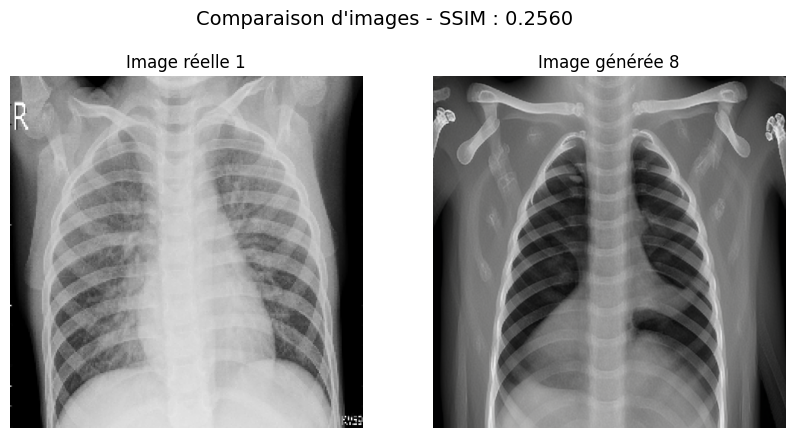

In [ ]:
from skimage.metrics import structural_similarity as ssim
import cv2
import matplotlib.pyplot as plt
import os

image_reelle_path = os.path.join("original", "PNEUMONIA_705.png")
image_generee_path = os.path.join("original", "pneumonia_lora_image_26.png")
img1_gray = cv2.imread(image_reelle_path, cv2.IMREAD_GRAYSCALE)
img2_gray = cv2.imread(image_generee_path, cv2.IMREAD_GRAYSCALE)

if img1_gray.shape != img2_gray.shape:
    img2_gray = cv2.resize(img2_gray, (img1_gray.shape[1], img1_gray.shape[0]))

score, diff = ssim(img1_gray, img2_gray, full=True)
print(f"SSIM : {score:.4f}")

img1_color = cv2.cvtColor(cv2.imread(image_reelle_path), cv2.COLOR_BGR2RGB)
img2_color = cv2.cvtColor(cv2.imread(image_generee_path), cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img1_color)
axes[0].set_title("Image réelle 1")
axes[0].axis("off")

axes[1].imshow(img2_color)
axes[1].set_title("Image générée 8")
axes[1].axis("off")

plt.suptitle(f"Comparaison d'images - SSIM : {score:.4f}", fontsize=14)
plt.show()



In [ ]:
import os
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
from itertools import combinations
folder = "original"
images = []
for filename in sorted(os.listdir(folder))[:10]:
    path = os.path.join(folder, filename)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        images.append(img)

base_shape = images[0].shape
images = [cv2.resize(img, (base_shape[1], base_shape[0])) for img in images]
ssim_values = []
for (img1, img2) in combinations(images, 2):
    score = ssim(img1, img2)
    ssim_values.append(score)
mean_ssim = np.mean(ssim_values)

print(f"Nombre de comparaisons : {len(ssim_values)}")
print(f"SSIM moyen entre les images réelles : {mean_ssim:.4f}")


Nombre de comparaisons : 45
SSIM moyen entre les images réelles : 0.3643


In [ ]:
from skimage.metrics import structural_similarity as ssim
import cv2
import os
import numpy as np

original_dir = "original"
generate_dir = "generate"

original_files = sorted(os.listdir(original_dir))
generate_files = sorted(os.listdir(generate_dir))
nb_images = min(len(original_files), len(generate_files))
ssim_scores = []

for i in range(nb_images):
    original_path = os.path.join(original_dir, original_files[i])
    generated_path = os.path.join(generate_dir, generate_files[i])

    img1_gray = cv2.imread(original_path, cv2.IMREAD_GRAYSCALE)
    img2_gray = cv2.imread(generated_path, cv2.IMREAD_GRAYSCALE)

    if img1_gray is None or img2_gray is None:
        continue

    if img1_gray.shape != img2_gray.shape:
        img2_gray = cv2.resize(img2_gray, (img1_gray.shape[1], img1_gray.shape[0]))

    score, _ = ssim(img1_gray, img2_gray, full=True)
    ssim_scores.append(score)
    print(f"{original_files[i]} vs {generate_files[i]} → SSIM : {score:.4f}")

if ssim_scores:
    print(f"\nSSIM moyen : {np.mean(ssim_scores):.4f}")
else:
    print("Aucune comparaison valide effectuée.")



PNEUMONIA_975.png vs pneumonia_lora_image_1.png → SSIM : 0.2431
PNEUMONIA_976.png vs pneumonia_lora_image_10.png → SSIM : 0.2864
PNEUMONIA_977.png vs pneumonia_lora_image_2.png → SSIM : 0.1731
PNEUMONIA_978.png vs pneumonia_lora_image_3.png → SSIM : 0.2042
PNEUMONIA_979.png vs pneumonia_lora_image_4.png → SSIM : 0.2871
PNEUMONIA_980.png vs pneumonia_lora_image_5.png → SSIM : 0.2472
PNEUMONIA_981.png vs pneumonia_lora_image_6.png → SSIM : 0.2032
PNEUMONIA_982.png vs pneumonia_lora_image_7.png → SSIM : 0.2412
PNEUMONIA_983.png vs pneumonia_lora_image_8.png → SSIM : 0.2115
PNEUMONIA_984.png vs pneumonia_lora_image_9.png → SSIM : 0.2314

SSIM moyen : 0.2328


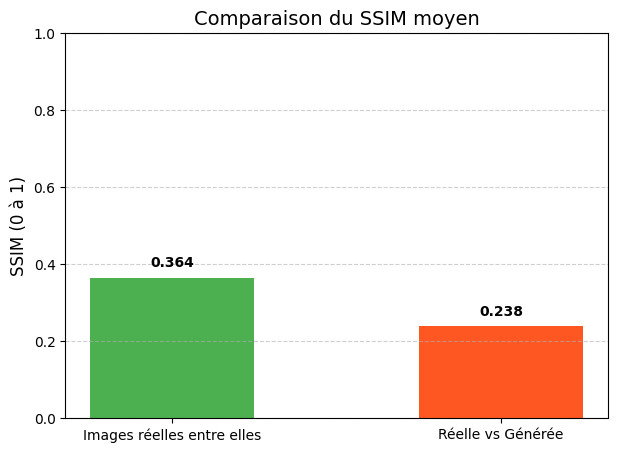

In [ ]:
import matplotlib.pyplot as plt
ssim_reelles = 0.364
ssim_generees = 0.238
categories = ["Images réelles entre elles", "Réelle vs Générée"]
valeurs = [ssim_reelles, ssim_generees]
plt.figure(figsize=(7, 5))
bars = plt.bar(categories, valeurs, color=["#4CAF50", "#FF5722"], width=0.5)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.3f}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.title("Comparaison du SSIM moyen", fontsize=14)
plt.ylabel("SSIM (0 à 1)", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


# Calcul PSNR


In [ ]:
import cv2
import os
import numpy as np


def calculate_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    PIXEL_MAX = 255.0
    return 10 * np.log10(PIXEL_MAX / np.sqrt(mse))

original_dir = "original"
generate_dir = "generate"
original_files = sorted(os.listdir(original_dir))
generate_files = sorted(os.listdir(generate_dir))
psnr_scores = []

nb_images = min(len(original_files), len(generate_files))
for i in range(nb_images):
    original_path = os.path.join(original_dir, original_files[i])
    generated_path = os.path.join(generate_dir, generate_files[i])

    img1 = cv2.imread(original_path)
    img2 = cv2.imread(generated_path)

    if img1 is None or img2 is None:
        continue


    if img1.shape != img2.shape:
        img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

    psnr_value = calculate_psnr(img1, img2)
    psnr_scores.append(psnr_value)

    print(f"{original_files[i]} vs {generate_files[i]} → PSNR : {psnr_value:.2f} dB")

if psnr_scores:
    print(f"\nPSNR moyen : {np.mean(psnr_scores):.2f} dB")
else:
    print("Aucune comparaison valide effectuée.")


PNEUMONIA_975.png vs pneumonia_lora_image_1.png → PSNR : 27.90 dB
PNEUMONIA_976.png vs pneumonia_lora_image_10.png → PSNR : 27.98 dB
PNEUMONIA_977.png vs pneumonia_lora_image_2.png → PSNR : 27.95 dB
PNEUMONIA_978.png vs pneumonia_lora_image_3.png → PSNR : 28.05 dB
PNEUMONIA_979.png vs pneumonia_lora_image_4.png → PSNR : 27.81 dB
PNEUMONIA_980.png vs pneumonia_lora_image_5.png → PSNR : 27.81 dB
PNEUMONIA_981.png vs pneumonia_lora_image_6.png → PSNR : 27.85 dB
PNEUMONIA_982.png vs pneumonia_lora_image_7.png → PSNR : 27.88 dB
PNEUMONIA_983.png vs pneumonia_lora_image_8.png → PSNR : 27.88 dB
PNEUMONIA_984.png vs pneumonia_lora_image_9.png → PSNR : 28.20 dB

PSNR moyen : 27.93 dB
